# Week 1: From the one-half rule to the bunching method

This homework session 1 of Statistical Mechanics: Algorithms and Computations is divided into three parts (A, B, C).

In the **first part**, you estimate $\pi$ by using a **direct-sampling algorithm** and determine the statistical error of your numerical calculation.

In [1]:
import random, math, pylab

In [2]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

In [3]:
def simulate_error(func=direct_pi, delta=None):
    n_runs, n_trials_list, rms = 500, [], []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigmasq = 0.0
        for _ in range(n_runs):
            n_hits = direct_pi(n_trials) if func == direct_pi else markov_pi(n_trials, delta)[0]
            pi_est = 4.0 * n_hits / n_trials
            sigmasq += (pi_est - math.pi) ** 2
        rms.append(math.sqrt(sigmasq/(n_runs)))
        n_trials_list.append(n_trials)
    return n_trials_list, rms

In [4]:
def plot(plot_line=True, label_direct=True):
    if plot_line:
        pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label='direct')
        if label_direct: pylab.legend(loc='upper right')
    pylab.xscale('log')
    pylab.yscale('log')
    pylab.xlabel('number of trials')
    pylab.ylabel('root mean square deviation')
    # pylab.savefig('direct_sampling_rms_deviation.png')

A1. Direct Root Mean Square

In [5]:
n, rms = simulate_error()

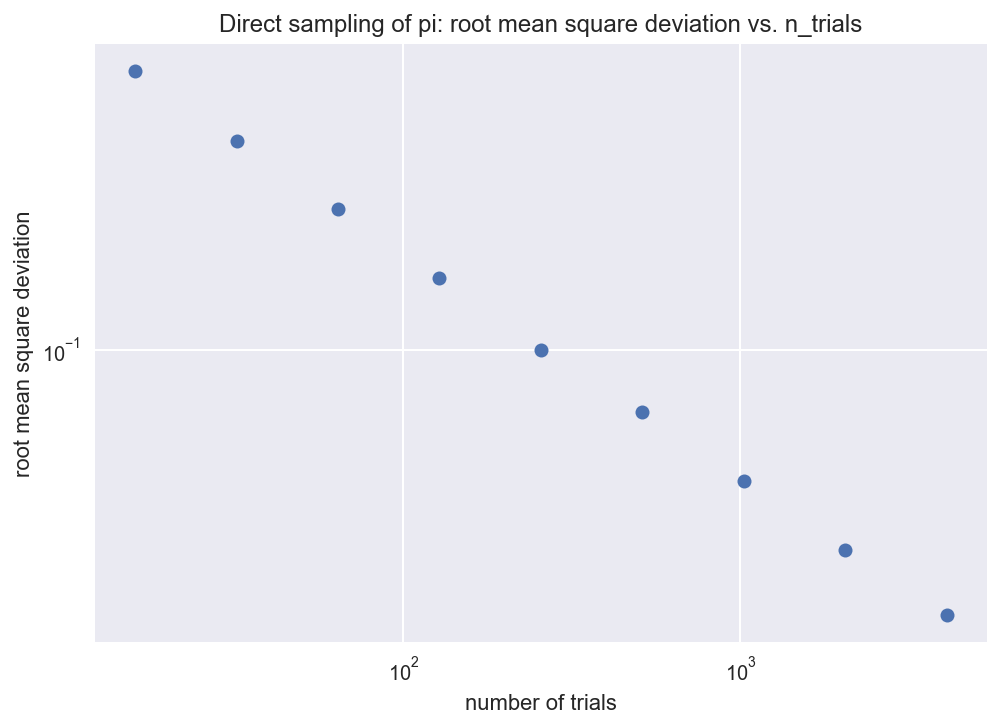

In [6]:
pylab.plot(n, rms, 'o')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
plot(plot_line=False)

A2. Direct RMS with a fitted line

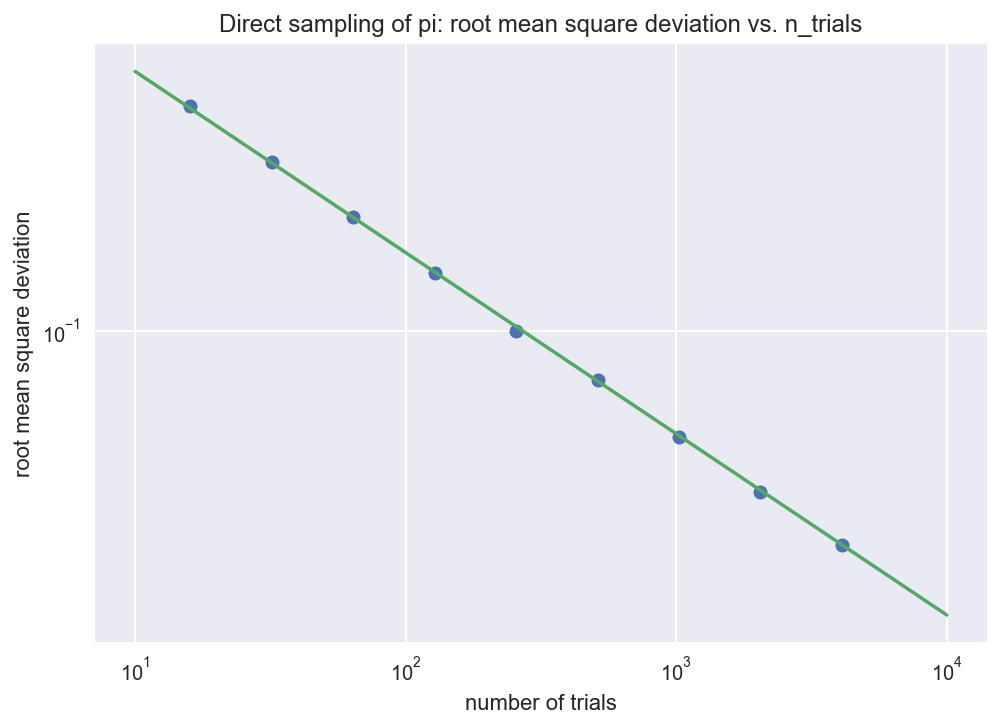

In [7]:
pylab.plot(n, rms, 'o')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
plot(label_direct=False)

- Explain where in the program you added the above line.

> I added the line just after the other **pylab.plot** line. (It's alright as long as we add it after the end of the **for poweroftwo** loop and before the **pylab.show** line.)

- Explain in a few words why one can say that the "error" of the direct_pi calculation goes like 1.642 / sqrt(N_trials) (maybe explain what that means at n_trials = 100). Does the "error" of the direct-sampling algorithm go to zero as N_trials goes to infinity?

> In short, the error shinks like the line because of the **Central Limit Theorem**. Yes, it should tend to zero as n goes to infinity.

> Note that our Monte Carlo estimations of 𝜋 are essentially a series of sample means (averages of 0s and 1s), so they should follow the CLT: 

> The standard error (RMS deviation of the sample means) should proximately equal to **σ / sqrt(n)**, the true standard deviation divided by square root of the sample size.

> The 1.642 is the standard deviation of the Bernoulli distribution (of whether a pebble ends up in the circle) times 4 (the area of the square): 

> σ = 4 * sqrt( p * (1-p) ) = 4 * sqrt( (𝜋/4) * (1 - 𝜋/4) ) = 1.64 .

> (Only after working out the above did I realize that I have answered a slightly different question from the one actually asked. Well, so be it.)


In the **second part**, you again estimate pi, but this time for a **Markov-chain algorithm**.  The precision of the result depends on the step size delta, which itself changes the rejection rate.  You will see that performance is best when delta is chosen such that about half of the proposed moves are accepted. This is called  the "**1/2 rule**". It is a rule of thumb, not a mathematical law.

In [8]:
def markov_pi(N, delta):
    x = y = 1.0
    n_hits = n_accepts = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_accepts += 1
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits, n_accepts

B1. Markov Chain RMS

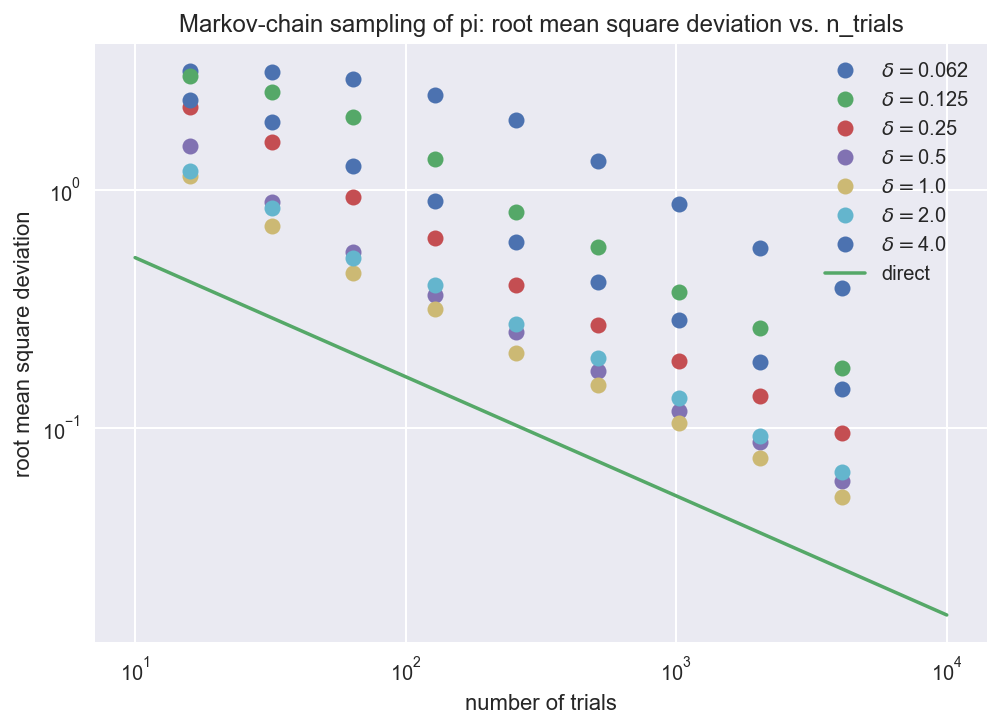

In [9]:
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n, rms = simulate_error(func=markov_pi, delta=delta)
    pylab.plot(n, rms, 'o', ms=8, label='$\delta = $' + str(delta))
    
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
plot()

- Which of the values of delta gives the most precise results?

> The most precise results are from deltas of 0.5, 1, and 2, out of which 1 is the best.

- Explain why VERY small values of delta and VERY large values of delta yield a less precise result than intermediate values.

> Very small values of delta would take longer to explore the sample space, while very large ones would discard a higher percentage of moves. Both need longer time to converge (thus less precise in the same amount of time) than intermediate values.

- Explain in a few words why the error is larger than for the direct sampling algorithm, even for the optimal value of delta.

> No matter how good a Markov Chain algorithm is, it would discard SOME of the moves, while the direct sampling discards NONE. Hence the difference in convergence time (and error).

B2. The 1/2 Rule of Thumb 

In [10]:
n_trials = 2 ** 12
print('delta  | acceptance rate')
for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    print(f'{delta} | {markov_pi(n_trials, delta)[1] / n_trials:6.2%}')

delta  | acceptance rate
0.062 | 96.85%
0.125 | 93.16%
0.25 | 87.82%
0.5 | 76.42%
1.0 | 55.64%
2.0 | 25.44%
4.0 |  6.98%


- Compare with the results of Section B1, do you confirm that an acceptance rate of approximately 1/2 gives the best results?

> Yes, an acceptance rate of about 57.25% corresponds to the  delta value of 1, which also gave the best Markov Chain result.

In section A, we saw that the error of direct_pi behaves as **1.642 / sqrt(N_trials)**. 

While in Section B, we noticed that the error of markov_pi follows the law: **const / sqrt(N_trials)** for large N_trials. The constant is larger (sometimes much larger) than 1.642 and it depends on the stepsize  delta.

In  this Section we understand what the value 1.642 means and how we can  compute it with and without knowing the mathematical value of pi. We then find a good way to compute the error in markov_pi.py from a single  run and without knowing the mathematical value of pi . This is the **bunching method**.

C1. True Standard Deviation

In [11]:
n_trials = 400000
n_hits = var = 0
for iter in range(n_trials):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    Obs = 0.0
    if x**2 + y**2 < 1.0:
        n_hits += 1
        Obs = 4.0
    var += (Obs - math.pi)**2
print(4.0 * n_hits / n_trials, math.sqrt(var / n_trials))

3.14203 1.6418793105389273


C2. Sample Standard Deviation

In [16]:
import random, math

n_trials = 400000.
sum_obs = sum_sqs = 0
for _ in range(int(n_trials)):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    ob = 4 * (x**2 + y**2 < 1.0)
    sum_obs += ob
    sum_sqs += ob * ob
avg_obs = sum_obs / n_trials
avg_sqs = sum_sqs / n_trials
var = avg_sqs - avg_obs ** 2
print(math.sqrt(var))

1.641447829661363


C3. Bunching

3.142803192138672 mean value, estimate of pi
0.001210538548878759 error


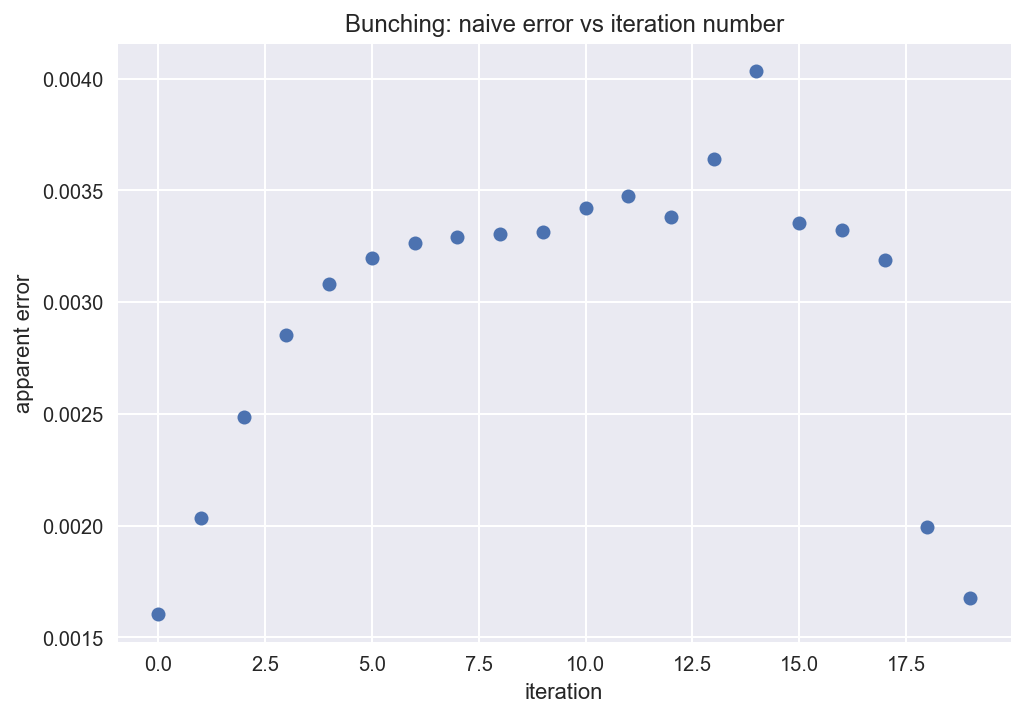

In [13]:
def markov_pi_all_data(N, delta):
    x, y, data = 1.0, 1.0, []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        data.append(4 * (x ** 2 + y ** 2 < 1.0))
    return data

def direct_pi_all_data(N):
    u = random.uniform
    return [4 * (u(-1, 1)**2 + u(-1, 1)**2 < 1) for _ in range(N)]

poweroftwo, delta = 20, 1.1
n_trials = 2 ** poweroftwo
data = markov_pi_all_data(n_trials, delta)
# data = direct_pi_all_data(n_trials)
errors, bunches  = [], []
for i in range(poweroftwo):
    new_data = []
    mean = mean_sq = 0.0
    N = len(data)#; print(N)
    while data:
        x, y = data.pop(), data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append( (x + y) / 2.0 )
    errors.append( math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N) )
    bunches.append(i)
    data = new_data[:]
print(mean / float(N), 'mean value, estimate of pi')
print(abs(mean / float(N) - math.pi), 'error')
pylab.plot(bunches, errors, 'o')
pylab.xlabel('iteration')
pylab.ylabel('apparent error')
pylab.title('Bunching: naive error vs iteration number');

- Explain  in a few words why the apparent error initially increases with the  iterations, then saturates  (more or less) to a plateau.

> The apparent error was smaller initially because Markov Chain data was highly correlated before bunching. High correlation means smaller variance (error), thus underestimating the actual error. After bunching, the data becomes less correlated, resulting in higher variance (error) and shrinking underestimation.

- The  program outputs the mean value (which does not change with iteration),  the Monte Carlo evaluation pi^est of pi. Compare the absolute value of  (pi^est - pi) with the plateau error. Are they similar?

> I guess they are similar. Using a near-optimal delta of 1.1, both turned out to be around 0.003.